# MVGmeinRad Part 1: Mapping bike sharing data via Folium

<img src="https://upload.wikimedia.org/wikipedia/commons/thumb/7/76/MVGmeinRad-Logo.jpg/1200px-MVGmeinRad-Logo.jpg" width="500" height="500" />

Since 2012 the transportation operator (MVG) of my adopted city of Mainz offers a bike rental system called [MVGmeinRad](https://de.wikipedia.org/wiki/MVGmeinRad) with more than [100 stations](https://www.mainzer-mobilitaet.de/en/mainzigartig-mobil/mit-mvgmeinrad/einfuehrung.html) citywide.
One can check via an interactive [map](https://www.mainzer-mobilitaet.de/mainzigartig-mobil/mit-mvgmeinrad/stationen.html) where each station is located and what its current numper of free bikes is. The underlying data is readily stored in JSON format and can thus be used for data exploration hassle-free. Unfortunately, only data related to the station itself, and not on actual trips taken, is made available. However, even this limited information is worth-while to explore.

The inspiration for this notebook came from several [great](http://luisvalesilva.com/datasimple/citibike.html) [blog](https://georgetsilva.github.io/posts/mapping-points-with-folium/) [posts](https://blog.prototypr.io/interactive-maps-with-python-part-1-aa1563dbe5a9) on how to graphical explore bike sharing data with the [folium](https://github.com/python-visualization/folium) package and which made me want to do the same for Mainz.

Let's first have a look on the interactive map of all [MVGMeinRad-stations](https://www.mainzer-mobilitaet.de/mainzigartig-mobil/mit-mvgmeinrad/stationen.html):

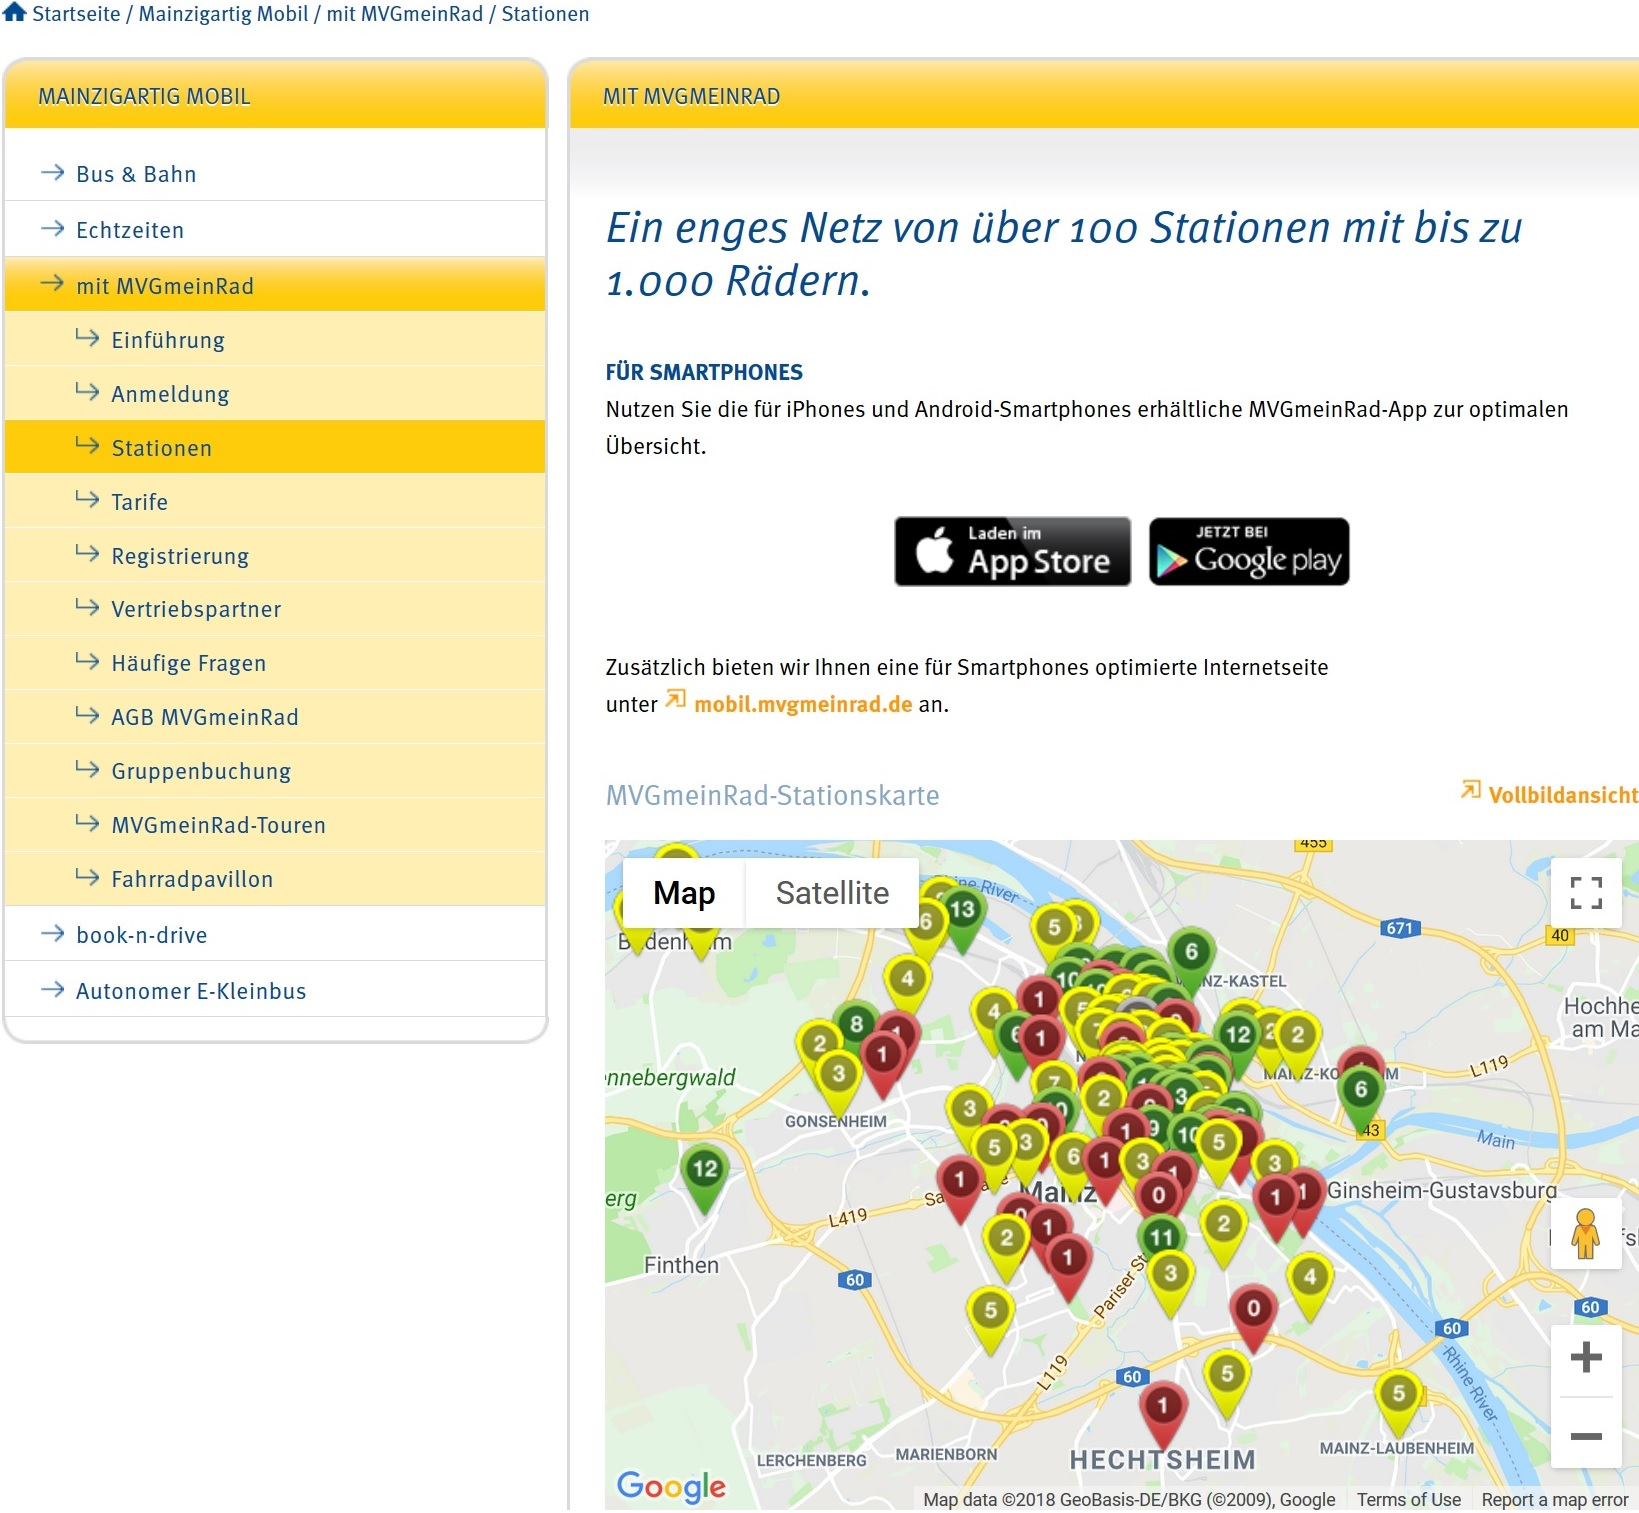

Let's take a look at the station data in its raw JSON form:

In [1]:
#Load packages:
import pandas as pd
import numpy as np
import datetime as dt
import folium
import requests
import json
from matplotlib.colors import Normalize, rgb2hex
import matplotlib.cm as cm

In [2]:
url = "http://www.mvg-mainz.de/mainzigartig-mobil/mit-mvgmeinrad/stationen.html?type=1296727024&tx_mvgmeinrad_mvgmeinradstationen[action]=getStationsAjax"
content = requests.get(url).json()
print "MVGmeinRad station information retrived at",dt.datetime.now() 
print(json.dumps(content, indent=1))

MVGmeinRad station information retrived at 2018-11-07 18:07:54.101000
[
 {
  "capacity": 18, 
  "name": "Mainzer Stadtwerke AG", 
  "address_hint": "Haltestelle Feldbergplatz", 
  "bikes_available": 5, 
  "longitude": "8.263784", 
  "address": "Haltestelle Feldbergplatz", 
  "latitude": "50.01067", 
  "docks_available": 13, 
  "id": 32, 
  "blocked": false
 }, 
 {
  "capacity": 18, 
  "name": "Frauenlobplatz", 
  "address_hint": "Frauenlobstra\u00dfe / Ecke Forsterstra\u00dfe", 
  "bikes_available": 0, 
  "longitude": "8.263179", 
  "address": "Frauenlobstra\u00dfe / Ecke Forsterstra\u00dfe", 
  "latitude": "50.007725", 
  "docks_available": 18, 
  "id": 74, 
  "blocked": true
 }, 
 {
  "capacity": 18, 
  "name": "Proviantamt", 
  "address_hint": "Neue Universit\u00e4tsstra\u00dfe / Ecke Schillerstra\u00dfe", 
  "bikes_available": 5, 
  "longitude": "8.265172", 
  "address": "Neue Universit\u00e4tsstra\u00dfe / Ecke Schillerstra\u00dfe", 
  "latitude": "49.999501", 
  "docks_available"

This information can be easier read and analyzed by loading it into a Pandas DataFrame:

In [3]:
df = pd.read_json(url)
df

,address,address_hint,bikes_available,blocked,capacity,docks_available,id,latitude,longitude,name
0,Haltestelle Feldbergplatz,Haltestelle Feldbergplatz,5,False,18,13,32,50.010670,8.263784,Mainzer Stadtwerke AG
1,Frauenlobstraße / Ecke Forsterstraße,Frauenlobstraße / Ecke Forsterstraße,0,True,18,18,74,50.007725,8.263179,Frauenlobplatz
2,Neue Universitätsstraße / Ecke Schillerstraße,Neue Universitätsstraße / Ecke Schillerstraße,5,False,18,12,20,49.999501,8.265172,Proviantamt
3,Anzengasse / Turnvater-Jahn-Straße,Anzengasse / Turnvater-Jahn-Strasse,4,False,12,6,93,49.983336,8.239993,Turnvater-Jahn-Straße
4,Haltestelle Hindenburgplatz,Haltestelle Hindenburgplatz,7,False,15,8,36,50.006208,8.263618,Hindenburgplatz
5,Dagobertstraße,Dagobertstraße,16,False,24,4,117,49.995790,8.281683,Malakoff-Terrasse 2
6,Feldbergstraße / Ecke Wallaustraße,Feldbergstraße / Ecke Wallaustraße,8,False,24,16,108,50.010559,8.260654,Feldbergstraße
7,Frauenlobstraße / Ecke Hafenstraße,Frauenlobstraße / Ecke Hafenstraße,12,False,18,6,76,50.010207,8.266174,Hafenstraße
8,Gartenfeldplatz / Ecke Kurfürstenstraße,Gartenfeldplatz / Ecke Kurfürstenstraße,2,False,24,22,75,50.005819,8.259490,Gartenfeldplatz
9,Haltestelle Höfchen / Alte Universität,Haltestelle Höfchen / Alte Universität,14,False,30,14,24,49.999648,8.271715,Höfchen


We can see that the station data can be separated into three broad groups:

-  the station `name` and the unique station-`id` help **identify** each station
-  **location information** is given via the station-address and the `latitude` and `longitude` parameters 
-  information on the stations **current state** are:
    -  `capacity` gives the total number of docks of a station
    -  `bikes_available` and `docks_available` gives the current utilization of the station
    -  `blocked` is a boolean that indicates wheter the station is temporarily not available
    
Unfortunately there is no information on individual bike-rides in the data. Still, the available information on the 119 bike-stations allow us to look at the average utilization of each station, correlation between stations, the utilization of the entire grid and so forth. 

However, in this notebook we will restrict ourselves to plotting interactive maps of Mainz and its network of bike rental stations. We will do so with the help of the `Folium` library, which allows for the easy creation of interactive Leaflet maps in the spirit of the JavaScript library of the same name. 

Plotting a map is as easy as specifying the coordinates of the map-midpoint. One of its nice features is that `Folium` offers different tilesets to alter the general look of the map. Two very nice tilesets are `CartoDB` and `Stamen`. Of the latter, my personal favorite is `stamenwatercolor`, which lets us depict the city ofMainz in the style of a beatiful water colour painting:

In [4]:
folium.Map(location=[50.01, 8.24], tiles="stamenwatercolor", zoom_start=13.3)

We will begin by recreating the interactive map displayed above via the folium library. `Folium` allows the easy creation of interactive Leaflet maps in the spirit of the JavaScript library of the same name. Let us beginn with a relative simple map that will mark each station via its `latitude` and `longitude`. In addition, the respective station name should be displayed for a selected marker:

In [5]:
#Define folium map
folium_map = folium.Map(location=[49.99, 8.17], zoom_start=12)

#Iterate over station and place on map
for point in range(df.shape[0]):
    folium.Marker(location=df.loc[point,['latitude', 'longitude']].values.tolist(),
                  popup=df['name'][point]).add_to(folium_map)

#Display map
folium_map

This map gives a good overview over the magnitude of the grid, which extends to nearby towns like Ingelheim and even crosses the Rhine into the neighboring federal state of Hesse.

However,the above visualization does not make use of the information regarding the current state of a station. As a finger exersice we want to recreate the spirit of the original map, by defining the icons for each station as follows:

-  stations blocked due to repairs are indicated by a wrench on gray background
-  for each staton we want to display the number of available bikes and free docks along with the name of the station
-  stations with less than two bikes available should be highlighted in red
-  if a station has at least half its bike available should be indicated by a green background, if not by a orange background

Unfortunately the number of available bikes is not easily displayed directly on each station-icon. However, the fontawsome project allows for the easy incorporation of many different [icons](https://fontawesome.com/v4.7.0/icons/).

Finally, we choose a different map-style via the `tiles=` option in the `folium.Map` statement. The resulting map resembles the original map much closer and offers more information at first glance:


In [6]:
#Define folium map
folium_map = folium.Map(location=[50, 8.27], tiles="stamenterrain", zoom_start=14)

#Iterate over station and place on map
for index, row in df.iterrows():
    icon = "bicycle"
    if row["blocked"] == True:
        icon = "wrench"
        color = "gray"
    elif row["bikes_available"] <= 1:
        color = color="red"
    elif row["bikes_available"] >= row["docks_available"]:
        color="green"
    else:
        color="orange" 
        
    folium.Marker(location=(row["latitude"],row["longitude"]),
                  icon=folium.Icon(color=color, prefix = 'fa', icon=icon),
                  popup=row["name"]+"  |  Bikes available: " + str(row["bikes_available"]) 
                          +"  |  Free docks: " + str(row["docks_available"])).add_to(folium_map)
    
folium_map

This map already gives us a good idea about the current utilization of the bike rental system. However, we can highlight other aspects of the data by using different map settings. For instance, `Foliums CircleMarker` represents points on a map as circles. Thus, we can illustrate a stations capacity by the radius of its circle. At the same time we want to represent 

with green representing a high share of available bikes relative to a stations capacity and red indicating a low share
similar to before. But now we want to represent this in a continuos fashion by mapping the share to a [colormap](https://nbviewer.jupyter.org/github/python-visualization/folium/blob/v0.2.0/examples/Colormaps.ipynb)





In [7]:
#Define folium map
folium_map = folium.Map(location=[49.995123, 8.267426], zoom_start=13, 
                        tiles='cartodbdark_matter') #dark tileset to make colors stand out more clearly

#Iterate over station and place on map
for index, row in df.iterrows():
    
    #Compute fraction of available bikes relative to total capacity and map share on colormap
    bike_share =float(row["bikes_available"])/float(row["capacity"])
    color = rgb2hex(cm.RdYlGn(bike_share))
    
    folium.CircleMarker(location=(row["latitude"],row["longitude"]),
                        popup= row["name"] + ": " + str(row["bikes_available"]) + " out of " + str(row["capacity"]) + " bikes available",
                        radius=row["capacity"],
                        color=color,
                        fill=True).add_to(folium_map )
    
#Display map
folium_map

Another nice feature of the `Folium` library is its capitbility of overlaying a map with stunning heatmaps via external `plugins`. The implementation as can be seen in [this Kaggle notebook](https://www.kaggle.com/rachan/how-to-folium-for-maps-heatmaps-time-analysis#). The important point to keep in mind is that one cannot use a `Pandas DataFrame` but has to use a list of latitudinal longitudinal points. The number of nearby points determines the "heat" of an area. 

We can illustrate the distribution of bike rental stations in this fashion:

In [8]:
from folium import plugins
from folium.plugins import HeatMap

#Define folium map
folium_map = folium.Map(location=[49.995123, 8.267426],
                        tiles='Stamen Toner', #Light tile makes the heatmap stand out more easily
                        zoom_start=12)

#Keep only longitude and latitude as list of lists
heat_data = df[["latitude", "longitude"]].values.tolist()

#Alternatively using list comprenshion:
#heat_df = df[['latitude', 'longitude']]
#heat_data = [[row['latitude'],row['longitude']] for index, row in heat_df.iterrows()]

#Add to map
HeatMap(heat_data).add_to(folium_map)

#Display map
folium_map

This is a nice style of visualization, but heatmaps do really shine when it comes to displaying movement over time. For instance, it seems worthwhile to look at changes in the number of bikes at each station. We will do so in a later notebook, once we have collected repeated observations over time.

At this point we will content ourselves to a heatmap of the available bikes per station for the given point in time. For this, we keep the number of availables bikes as a weight-variable along with the longitude-latitude pairs. The resulting heatmap reveals a clustering of available bikes around the two existing train stations in Mainz:

In [9]:
#Define folium map
folium_map = folium.Map(location=[49.995123, 8.267426],tiles='Stamen Toner',zoom_start=12)

#Keep number of available bikes as well as weight variable
heat_data = df[["latitude", "longitude","bikes_available"]].values.tolist()

#Alternatively via repeat and list comprehension instead of weights:
#heat_df = df[["latitude", "longitude","bikes_available"]]
#heat_df = heat_df.loc[heat_df.index.repeat(heat_df["bikes_available"]),["latitude", "longitude"]].reset_index(drop=True)
#heat_data = [[row['latitude'],row['longitude'],row['bikes_available']] for index, row in heat_df.iterrows()]

#Add to map
HeatMap(heat_data).add_to(folium_map)

#Display map
folium_map